# **Daily Sunspot Number** [1/1/1818-now]
Dataet er fra https://www.sidc.be/SILSO/datafiles

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("Daily sunspot number.csv", delimiter=';')
år = data[:,0]
måned = data[:,1]
dato : data[:,2]
år_fraction = data[:,3]
sunspot_number = data[:,4]
standardafvigelse = data[:,5]
N = data[:,6]
data_kan_ændres = data[:,7]

## Alt plottet

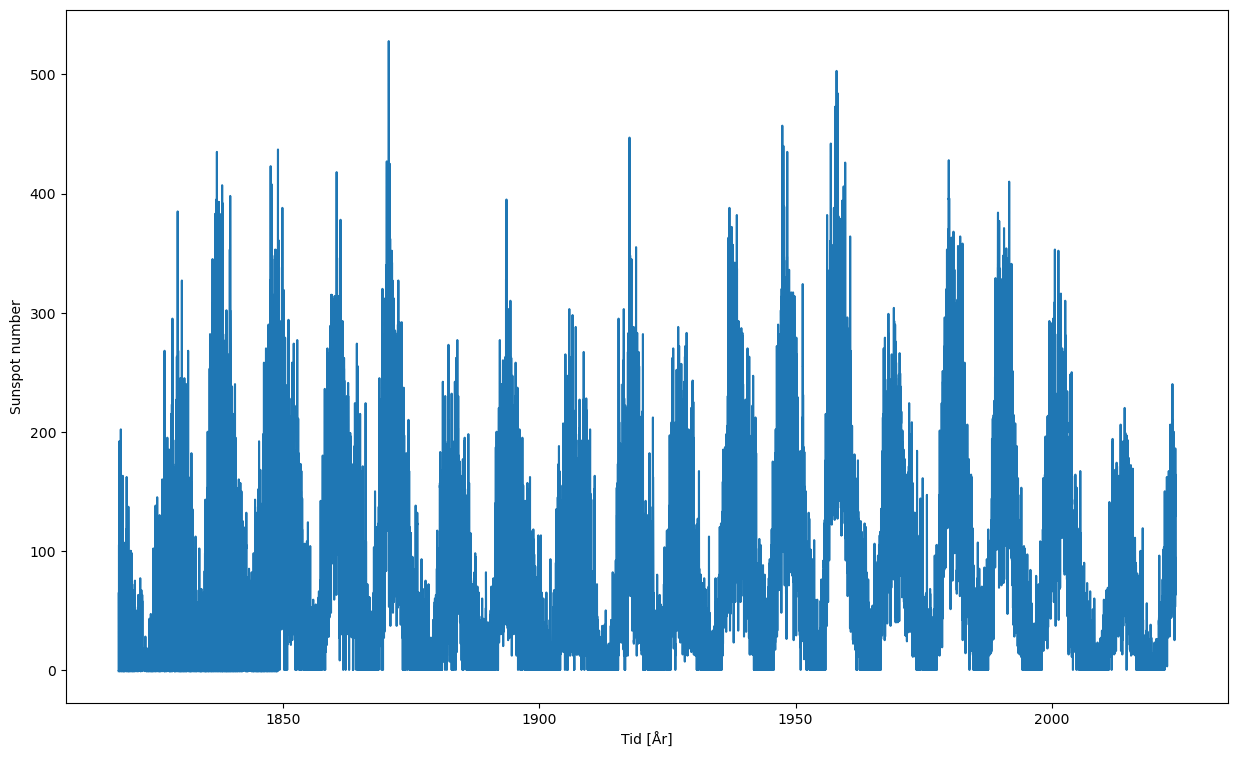

In [2]:
plt.figure(figsize=[15,9])
plt.plot(år_fraction,sunspot_number)
plt.xlabel("Tid [År]")
plt.ylabel("Sunspot number")
plt.show()

## Data uden manglende datapunkter

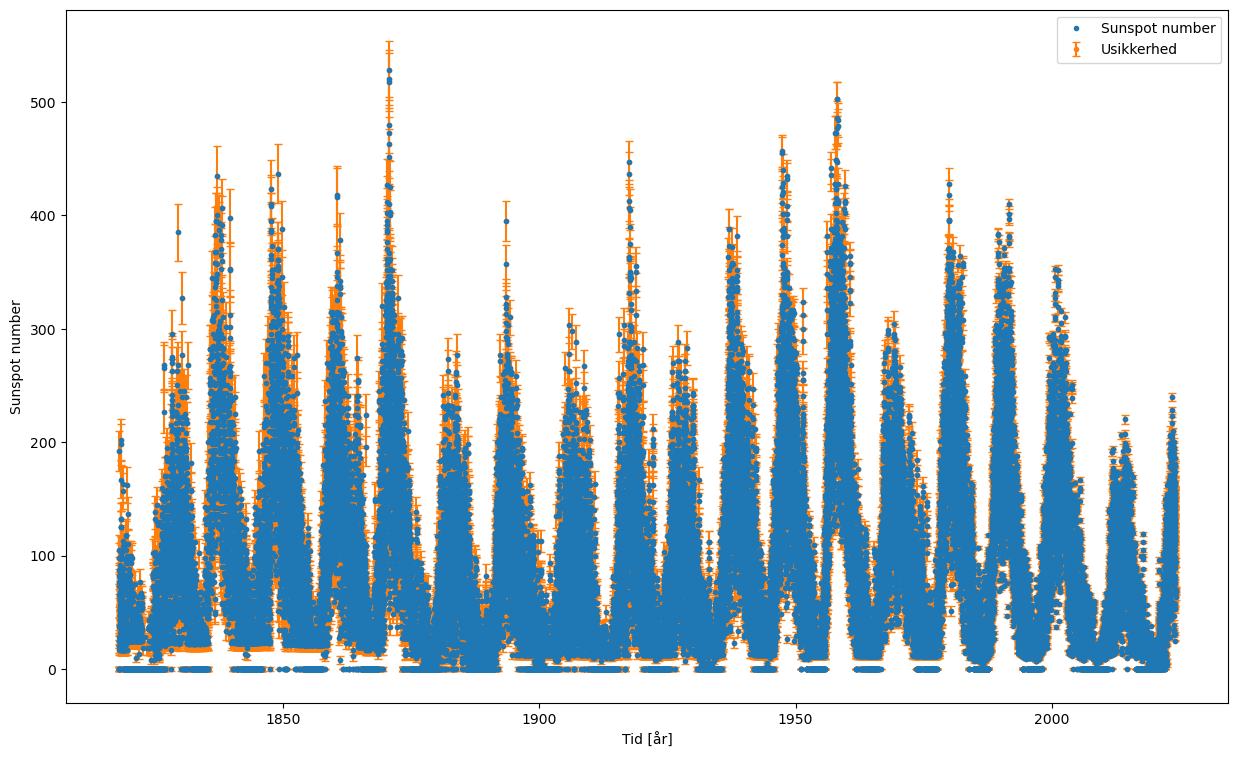

In [13]:
år_fraction2 =[]
sunspot_number2 = []
usikkerhed = []
for i in range(len(år_fraction)):
    if sunspot_number[i] != -1:
        år_fraction2.append(år_fraction[i])
        sunspot_number2.append(sunspot_number[i])
        usikkerhed.append(standardafvigelse[i]/np.sqrt(N[i]))

plt.figure(figsize=[15,9])
plt.xlim()
plt.plot(år_fraction2,sunspot_number2, '.', label="Sunspot number", zorder=1)
plt.errorbar(år_fraction2,sunspot_number2, fmt='.', yerr=usikkerhed, label="Usikkerhed", zorder=0, capsize=3)
plt.ylabel("Sunspot number")
plt.xlabel("Tid [år]")
plt.legend()
plt.show()

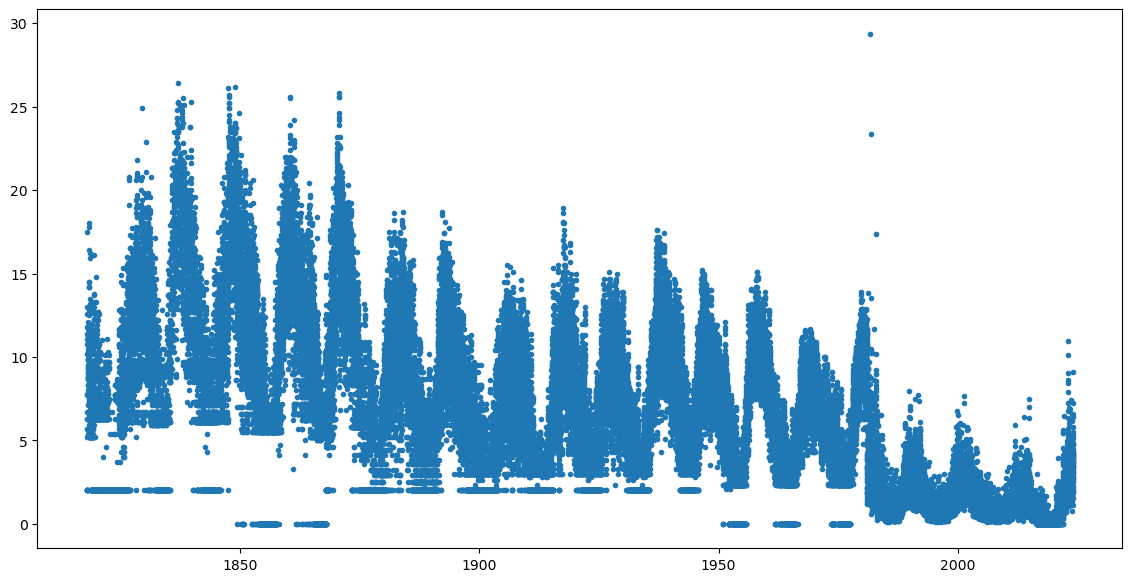

In [11]:
plt.figure(figsize=[14,7])
plt.plot(år_fraction2, usikkerhed, '.')

### Dage med 0 målte solpletter

In [5]:
count = 0
for i in range(len(sunspot_number2)):
    if sunspot_number2[i] == 0:
        count += 1
print(count)

11398


## Histogram over dage uden data

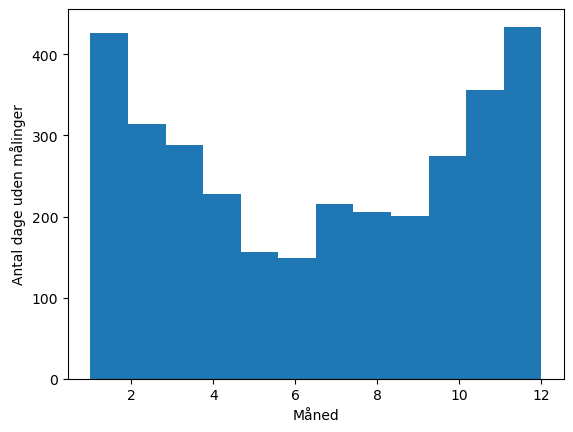

In [6]:
måned3 =[]
sunspot_number3 = []
for i in range(len(år_fraction)):
    if sunspot_number[i] == -1:
        måned3.append(måned[i])
        sunspot_number3.append(sunspot_number[i])

plt.hist(måned3, bins=12)
plt.ylabel("Antal dage uden målinger")
plt.xlabel("Måned")
plt.show()